# Análise de dados de jogadores da NBA

Isabela Marinho Ribeiro (imr)

Lucas e Silva de Souza (lss8)

## Glossário das features

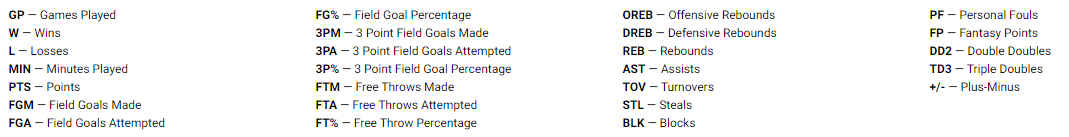

# Projeto 1

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
np.random.seed(10)

from sklearn.preprocessing import MinMaxScaler

### Importando o dataset

Importamos o dataset principal, e um secundário aonde vamos fazer as modificações e análises

In [2]:
df = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [3]:
df_main = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [4]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,AJ Griffin,ATL,20,20,8,12,170.7,48,18,62,...,18,5,8,1,2,6,78,0,0,-51
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333,471,1100,...,272,247,112,96,26,179,2284,1,0,127
2,Bruno Fernando,ATL,25,45,20,25,682.3,282,109,187,...,193,46,44,25,28,107,698,0,0,-96
3,Clint Capela,ATL,29,73,33,40,1883.1,836,353,618,...,776,91,74,43,106,164,2277,38,0,-17
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891,304,663,...,222,87,83,40,16,146,1373,3,0,-49


In [5]:
df.shape

(571, 29)

### Definição de tipos

Aqui verificamos que temos duas colunas do tipo object, a "PLAYER" que contém o nome dos jogadores, e a "TEAM", que contém os times ao qual os jogadores fazem parte.

In [6]:
df.dtypes

PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM         int64
3PA         int64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB        int64
DREB        int64
REB         int64
AST         int64
TOV         int64
STL         int64
BLK         int64
PF          int64
FP          int64
DD2         int64
TD3         int64
+/-         int64
dtype: object

Vamos criar uma nova coluna chamada "TEAMID", para facilitar análises futuras. Não achamos necessário alterar a coluna com o nome dos jogadores.

In [7]:
df['TEAMID'] = df['TEAM'].astype('category')

In [8]:
df['TEAMID'] = df['TEAMID'].cat.codes

In [9]:
df[['TEAM','TEAMID']]

,TEAM,TEAMID
0,ATL,0
1,ATL,0
2,ATL,0
3,ATL,0
4,ATL,0
...,...,...
566,WAS,29
567,WAS,29
568,WAS,29
569,WAS,29


### Limpeza de dados

#### Remoção aleatória de dados para tratar dados ausentes

Como não temos nenhum dado ausente, vamos deletar dados aleatórios da coluna "PTS" para usar tecnicas de inputação depois.

In [10]:
df.isnull().any()

PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
TEAMID    False
dtype: bool

In [11]:
nan_indices = np.random.choice(df.index, 30, replace=False)
df.loc[nan_indices, 'PTS'] = np.nan

nulldf = df[df['PTS'].isna()]
nulldf.PTS

47    NaN
69    NaN
92    NaN
102   NaN
152   NaN
172   NaN
194   NaN
214   NaN
227   NaN
228   NaN
253   NaN
264   NaN
295   NaN
299   NaN
317   NaN
375   NaN
378   NaN
407   NaN
419   NaN
440   NaN
460   NaN
467   NaN
511   NaN
525   NaN
531   NaN
535   NaN
552   NaN
554   NaN
556   NaN
568   NaN
Name: PTS, dtype: float64

Aqui nós geramos as colunas "PPG", "RPG", "APG" (Points Per Game, Rebounds Per Game, Assist Per Game), pois são dados interessantes para se analisar, e também, no caso de PPG, é mais uma coisa que teremos que inputar nas linhas onde apagamos dados da coluna "PTS".

In [12]:
df['PPG'] = df['PTS']/df['GP']
df['RPG'] = df['REB']/df['GP']
df['APG'] = df['AST']/df['GP']

df.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,2,6,78,0,0,-51,0,2.400000,0.900000,0.250000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,26,179,2284,1,0,127,0,16.873418,3.443038,3.126582
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,28,107,698,0,0,-96,0,6.266667,4.288889,1.022222
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,106,164,2277,38,0,-17,0,11.452055,10.630137,1.246575
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,16,146,1373,3,0,-49,0,15.631579,3.894737,1.526316
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,24,138,3209,20,1,-154,0,22.474359,5.333333,6.435897
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,0,6,81,0,0,-16,0,2.529412,0.941176,0.588235
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,8,115,556,0,0,-97,0,4.924242,1.393939,0.560606
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,47,133,2027,19,1,-76,0,16.000000,8.714286,3.625000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,5,20,187,0,0,-35,0,4.764706,1.941176,1.588235


In [13]:
df.PPG.describe()

count    541.000000
mean       8.384144
std        6.846162
min        0.000000
25%        3.326531
50%        6.266667
75%       11.567901
max       34.692308
Name: PPG, dtype: float64

In [14]:
df.PTS.describe()

count     541.000000
mean      489.007394
std       515.773012
min         0.000000
25%        69.000000
50%       290.000000
75%       784.000000
max      2370.000000
Name: PTS, dtype: float64

#### Detecção de registros replicados

Verificamos que não existem registros duplicados

In [15]:
df[df.duplicated()].sort_values("PLAYER").head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG


#### Tratamento de dados ausentes

Aqui duplicamos o dataset, para fazer uma comparação entre a inputação de dados usando média, mediana e KNN mais a frente.

In [16]:
df2 = df.copy()
df3 = df.copy()

In [ ]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,2,6,78,0,0,-51,0,2.400000,0.900000,0.250000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,26,179,2284,1,0,127,0,16.873418,3.443038,3.126582
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,28,107,698,0,0,-96,0,6.266667,4.288889,1.022222
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,106,164,2277,38,0,-17,0,11.452055,10.630137,1.246575
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,16,146,1373,3,0,-49,0,15.631579,3.894737,1.526316
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,24,138,3209,20,1,-154,0,22.474359,5.333333,6.435897
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,0,6,81,0,0,-16,0,2.529412,0.941176,0.588235
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,8,115,556,0,0,-97,0,4.924242,1.393939,0.560606
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,47,133,2027,19,1,-76,0,16.000000,8.714286,3.625000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,5,20,187,0,0,-35,0,4.764706,1.941176,1.588235


Aqui nós fazemos a inputação de dados, usando a média, mediana e KNN como parâmetros (uma em cada DF)

##### MEDIA

In [ ]:
def generatePTS_values(row):
  return round(df.PPG.mean() * row['GP'])

df.loc[df['PTS'].isna(), 'PTS'] = df[df['PTS'].isna()].apply(generatePTS_values,axis=1)

In [ ]:
df = df.fillna(df.PPG.mean())

In [ ]:
df.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,2,6,78,0,0,-51,0,2.400000,0.900000,0.250000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,26,179,2284,1,0,127,0,16.873418,3.443038,3.126582
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,28,107,698,0,0,-96,0,6.266667,4.288889,1.022222
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,106,164,2277,38,0,-17,0,11.452055,10.630137,1.246575
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,16,146,1373,3,0,-49,0,15.631579,3.894737,1.526316
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,24,138,3209,20,1,-154,0,22.474359,5.333333,6.435897
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,0,6,81,0,0,-16,0,2.529412,0.941176,0.588235
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,8,115,556,0,0,-97,0,4.924242,1.393939,0.560606
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,47,133,2027,19,1,-76,0,16.000000,8.714286,3.625000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,5,20,187,0,0,-35,0,4.764706,1.941176,1.588235


##### MEDIANA

In [ ]:
def generatePTS2_values(row):
  return round(df2.PPG.median() * row['GP'])

df2.loc[df2['PTS'].isna(), 'PTS'] = df2[df2['PTS'].isna()].apply(generatePTS2_values,axis=1)

In [ ]:
df2 = df2.fillna(df2.PPG.mean())

In [ ]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,2,6,78,0,0,-51,0,2.400000,0.900000,0.250000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,26,179,2284,1,0,127,0,16.873418,3.443038,3.126582
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,28,107,698,0,0,-96,0,6.266667,4.288889,1.022222
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,106,164,2277,38,0,-17,0,11.452055,10.630137,1.246575
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,16,146,1373,3,0,-49,0,15.631579,3.894737,1.526316
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,24,138,3209,20,1,-154,0,22.474359,5.333333,6.435897
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,0,6,81,0,0,-16,0,2.529412,0.941176,0.588235
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,8,115,556,0,0,-97,0,4.924242,1.393939,0.560606
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,47,133,2027,19,1,-76,0,16.000000,8.714286,3.625000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,5,20,187,0,0,-35,0,4.764706,1.941176,1.588235


#### KNN Imputer

In [17]:
import numpy as np
from sklearn.impute import KNNImputer

df3 = df3.drop(['PLAYER', 'TEAM'], axis=1)

In [18]:
df3_v2 = df3

In [19]:
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df3)

In [20]:
df3 = pd.DataFrame(imputed_data, columns=df3_v2.columns)

In [21]:
df3['PLAYER'] = df_main['PLAYER']
df3['TEAM'] = df_main['TEAM']

In [22]:
df3.head(50)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG,PLAYER,TEAM
0,20.0,20.0,8.0,12.0,170.7,48.0,18.0,62.0,29.0,10.0,...,78.0,0.0,0.0,-51.0,0.0,2.400000,0.900000,0.250000,AJ Griffin,ATL
1,31.0,79.0,35.0,44.0,2401.4,1333.0,471.0,1100.0,42.8,240.0,...,2284.0,1.0,0.0,127.0,0.0,16.873418,3.443038,3.126582,Bogdan Bogdanovic,ATL
2,25.0,45.0,20.0,25.0,682.3,282.0,109.0,187.0,58.3,0.0,...,698.0,0.0,0.0,-96.0,0.0,6.266667,4.288889,1.022222,Bruno Fernando,ATL
3,29.0,73.0,33.0,40.0,1883.1,836.0,353.0,618.0,57.1,0.0,...,2277.0,38.0,0.0,-17.0,0.0,11.452055,10.630137,1.246575,Clint Capela,ATL
4,26.0,57.0,26.0,31.0,1681.1,891.0,304.0,663.0,45.9,117.0,...,1373.0,3.0,0.0,-49.0,0.0,15.631579,3.894737,1.526316,De'Andre Hunter,ATL
5,27.0,78.0,34.0,44.0,2783.3,1753.0,672.0,1463.0,45.9,201.0,...,3209.0,20.0,1.0,-154.0,0.0,22.474359,5.333333,6.435897,Dejounte Murray,ATL
6,27.0,17.0,9.0,8.0,108.4,43.0,15.0,30.0,50.0,13.0,...,81.0,0.0,0.0,-16.0,0.0,2.529412,0.941176,0.588235,Dylan Windler,ATL
7,27.0,66.0,29.0,37.0,992.1,325.0,103.0,226.0,45.6,85.0,...,556.0,0.0,0.0,-97.0,0.0,4.924242,1.393939,0.560606,Garrison Mathews,ATL
8,22.0,56.0,27.0,29.0,1888.9,896.0,359.0,702.0,51.1,71.0,...,2027.0,19.0,1.0,-76.0,0.0,16.000000,8.714286,3.625000,Jalen Johnson,ATL
9,20.0,17.0,8.0,9.0,196.0,81.0,34.0,92.0,37.0,9.0,...,187.0,0.0,0.0,-35.0,0.0,4.764706,1.941176,1.588235,Kobe Bufkin,ATL


##### Avaliação da inputação

Aqui nós usamos o dataset principal e os indices das linhas que foram deletadas para resgatar o valor real, e comparamos com os valores que inputamos com a média, mediana e KNN para analisar a taxa de erro.

In [ ]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df.loc[nan_indices, 'PTS'].values

# Calculate the mean error
mean_error = np.mean(np.abs(real_values - calculated_values))

mean_error

205.2

In [ ]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df2.loc[nan_indices, 'PTS'].values

# Calculate the median error
median_error = np.mean(np.abs(real_values - calculated_values))

median_error

233.43333333333334

In [23]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df3.loc[nan_indices, 'PTS'].values

# Calculate the knn error
knn_error = np.mean(np.abs(real_values - calculated_values))

knn_error

47.8

As inputações com KNN resultaram na menor taxa de erro (47.8). Sendo assim, decidimos prosseguir a análise com o resultado da inputação dela.

### Normalização

Como quase todos os dados tem valores positivos, normalizamos entre 0 e 1, e removemos as colunas "PLAYER", "TEAM" e "TEAMID" da normalização pois não representam valores numéricos aserem analisados. Salvamos essa normalização em um novo dataset.

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [25]:
df_normalized = df3.drop(['PLAYER', 'TEAM', 'TEAMID'], axis=1)

In [26]:
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

In [27]:
df_normalized['PLAYER'] = df3['PLAYER']
df_normalized['TEAM'] = df3['TEAM']
df_normalized['TEAMID'] = df3['TEAMID']

In [28]:
df_normalized.head(10)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,PPG,RPG,APG,PLAYER,TEAM,TEAMID
0,0.05,0.228916,0.125000,0.184615,0.056896,0.020253,0.021505,0.037530,0.388220,0.028011,...,0.016923,0.000000,0.000000,0.442586,0.069180,0.065893,0.022939,AJ Griffin,ATL,0.0
1,0.60,0.939759,0.546875,0.676923,0.803474,0.562447,0.562724,0.665860,0.572959,0.672269,...,0.495552,0.012987,0.000000,0.577947,0.486373,0.252080,0.286881,Bogdan Bogdanovic,ATL,0.0
2,0.30,0.530120,0.312500,0.384615,0.228120,0.118987,0.130227,0.113196,0.780455,0.000000,...,0.151443,0.000000,0.000000,0.408365,0.180636,0.314008,0.093794,Bruno Fernando,ATL,0.0
3,0.50,0.867470,0.515625,0.615385,0.630008,0.352743,0.421744,0.374092,0.764391,0.000000,...,0.494033,0.493506,0.000000,0.468441,0.330104,0.778278,0.114380,Clint Capela,ATL,0.0
4,0.35,0.674699,0.406250,0.476923,0.562402,0.375949,0.363202,0.401332,0.614458,0.327731,...,0.297895,0.038961,0.000000,0.444106,0.450578,0.285150,0.140048,De'Andre Hunter,ATL,0.0
5,0.40,0.927711,0.531250,0.676923,0.931290,0.739662,0.802867,0.885593,0.614458,0.563025,...,0.696246,0.259740,0.038462,0.364259,0.647820,0.390476,0.590528,Dejounte Murray,ATL,0.0
6,0.40,0.192771,0.140625,0.123077,0.036045,0.018143,0.017921,0.018160,0.669344,0.036415,...,0.017574,0.000000,0.000000,0.469202,0.072910,0.068908,0.053974,Dylan Windler,ATL,0.0
7,0.40,0.783133,0.453125,0.569231,0.331805,0.137131,0.123059,0.136804,0.610442,0.238095,...,0.120634,0.000000,0.000000,0.407605,0.141940,0.102056,0.051439,Garrison Mathews,ATL,0.0
8,0.15,0.662651,0.421875,0.446154,0.631949,0.378059,0.428913,0.424939,0.684070,0.198880,...,0.439792,0.246753,0.038462,0.423574,0.461197,0.638010,0.332613,Jalen Johnson,ATL,0.0
9,0.05,0.192771,0.125000,0.138462,0.065364,0.034177,0.040621,0.055690,0.495315,0.025210,...,0.040573,0.000000,0.000000,0.454753,0.137342,0.142122,0.145729,Kobe Bufkin,ATL,0.0


### Discretização

Aqui discretizamos os valores da coluna "PPG", "REB", "AST" normalizada, e salvamos em novas colunas. Essas são as estatísticas mais importantes para vericar o desempenho de um jogador, sua média de pontos, rebotes e assistências.

In [29]:
df3['PPG_DIS'] = pd.cut(df3['PPG'],10)
df3['RPG_DIS'] = pd.cut(df3['RPG'],10)
df3['APG_DIS'] = pd.cut(df3['APG'],10)

In [30]:
df3['PPG_DIS'].value_counts()

PPG_DIS
(3.469, 6.938]      162
(-0.0347, 3.469]    148
(6.938, 10.408]      92
(10.408, 13.877]     61
(13.877, 17.346]     40
(17.346, 20.815]     25
(20.815, 24.285]     23
(24.285, 27.754]     15
(27.754, 31.223]      3
(31.223, 34.692]      2
Name: count, dtype: int64

In [ ]:
df3['RPG_DIS'].value_counts()

RPG_DIS
(1.366, 2.732]      154
(2.732, 4.098]      137
(-0.0137, 1.366]    110
(4.098, 5.463]       85
(5.463, 6.829]       30
(6.829, 8.195]       24
(8.195, 9.561]       15
(9.561, 10.927]       7
(10.927, 12.293]      5
(12.293, 13.659]      4
Name: count, dtype: int64

In [31]:
df3['APG_DIS'].value_counts()

APG_DIS
(-0.0109, 1.09]    232
(1.09, 2.18]       158
(2.18, 3.27]        66
(3.27, 4.359]       43
(4.359, 5.449]      34
(5.449, 6.539]      22
(6.539, 7.629]       6
(7.629, 8.719]       6
(8.719, 9.809]       2
(9.809, 10.899]      2
Name: count, dtype: int64

### Análise de Outliers

No caso do nosso dataset, os outliers não informam dados "incorretos", mas sim jogadores fora da curva em determinada categoria. Por isso, é uma análise muito útil para recrutamento.

#### Outliers Univariados (REB)

Aqui analisamos a coluna de Rebotes e encontramos os jogadores que se destacam nessa categoria.

In [ ]:
df3['REB'].describe()

count     571.000000
mean      187.273205
std       185.919268
min         0.000000
25%        37.000000
50%       141.000000
75%       273.000000
max      1120.000000
Name: REB, dtype: float64

<Axes: >

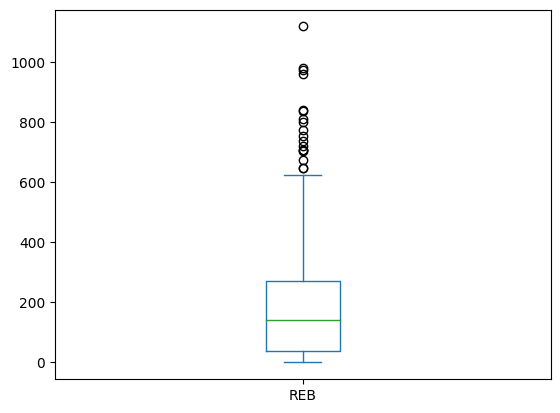

In [ ]:
df3['REB'].plot.box()

<Axes: >

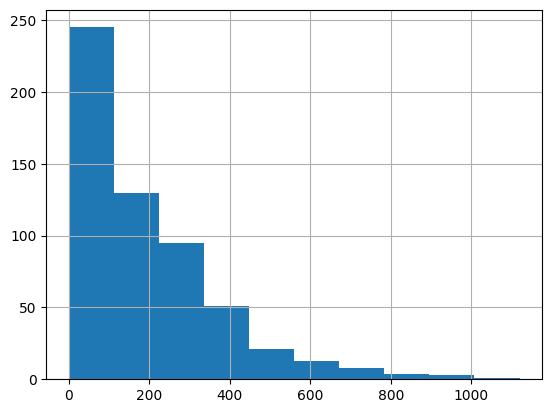

In [ ]:
df3['REB'].hist()

In [ ]:
from numpy import abs
mad = abs(df3['REB'] - df3['REB'].median()).median()*(1/0.6745)
print(mad)

167.53150481838398


In [ ]:
(df3['REB']-df3['REB'].mean()).abs().mean()

142.34509156823836

<Axes: >

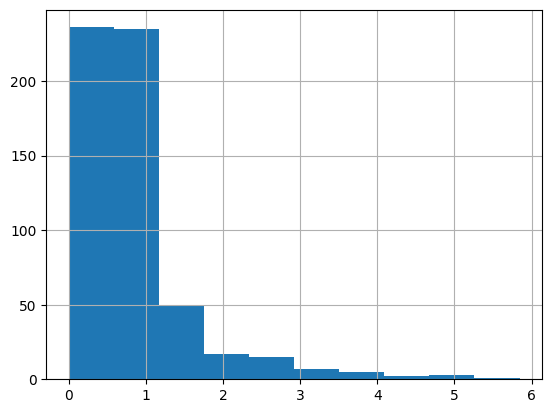

In [ ]:
(abs(df3['REB']-df3['REB'].median())/mad).hist()

In [ ]:
df3[abs(df3['REB']-df3['REB'].median())/mad > 3.5][['PLAYER', 'TEAM', 'REB']].sort_values(by=['REB'], ascending = False)

,PLAYER,TEAM,REB
480,Domantas Sabonis,SAC,1120.0
340,Rudy Gobert,MIN,982.0
143,Nikola Jokic,DEN,976.0
242,Anthony Davis,LAL,961.0
314,Giannis Antetokounmpo,MIL,841.0
448,Jusuf Nurkic,PHX,837.0
104,Jarrett Allen,CLE,811.0
87,Nikola Vucevic,CHI,801.0
3,Clint Capela,ATL,776.0
511,Victor Wembanyama,SAS,755.0


#### Outliers Bivariados (PPG)

Aqui analisamos a categoria de Pontos por Jogo, para encontrar os maiores pontuadores da liga.

In [ ]:
df3['PPG'].describe()

count    571.000000
mean       8.391931
std        6.767414
min        0.000000
25%        3.382308
50%        6.440000
75%       11.509978
max       34.692308
Name: PPG, dtype: float64

<Axes: >

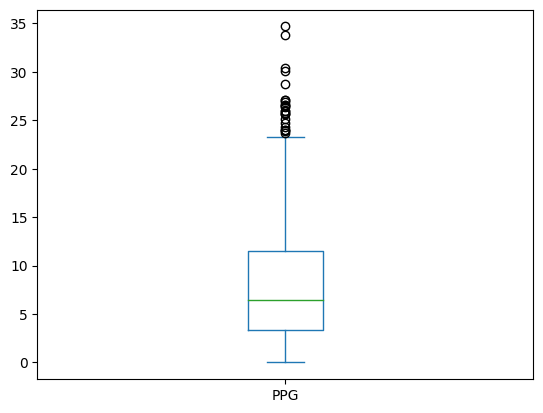

In [ ]:
df3['PPG'].plot.box()

<Axes: >

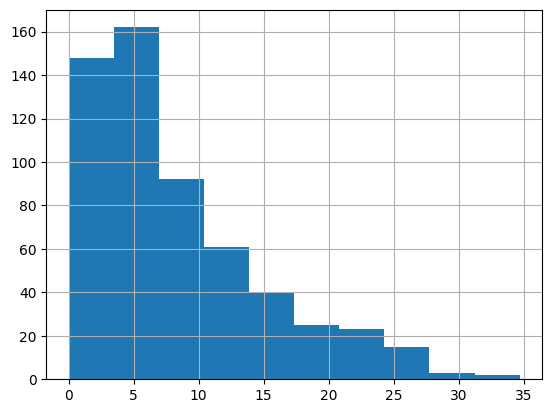

In [ ]:
df3['PPG'].hist()

In [ ]:
from numpy import abs
mad2 = abs(df3['PPG'] - df3['PPG'].median()).median()*(1/0.6745)
print(mad2)

5.495428712626637


In [ ]:
(df3['PPG']-df3['PPG'].mean()).abs().mean()

5.345546853869504

<Axes: >

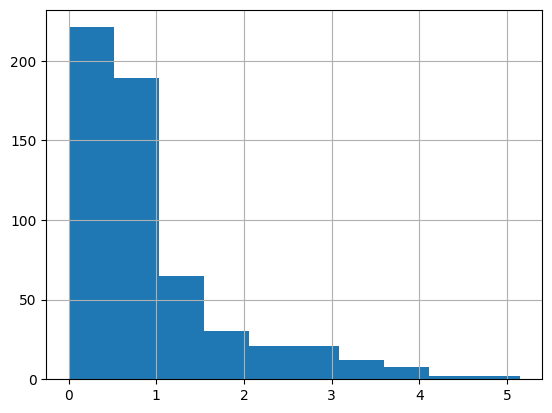

In [ ]:
(abs(df3['PPG']-df3['PPG'].median())/mad2).hist()

In [ ]:
df3[abs(df3['PPG']-df3['PPG'].median())/mad2 > 3.5][['PLAYER', 'TEAM', 'PPG']].sort_values(by=['PPG'], ascending = False)

,PLAYER,TEAM,PPG
426,Joel Embiid,PHI,34.692308
124,Luka Doncic,DAL,33.857143
314,Giannis Antetokounmpo,MIL,30.438356
398,Shai Gilgeous-Alexander,OKC,30.053333
370,Jalen Brunson,NYK,28.727273
449,Kevin Durant,PHX,27.093333
441,Devin Booker,PHX,27.073529
42,Jayson Tatum,BOS,26.851351
98,Donovan Mitchell,CLE,26.600000
479,De'Aaron Fox,SAC,26.567568


### Estatísticas descritivas

In [ ]:
df3.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,RPG,APG
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,25.992995,46.120841,23.187391,22.933450,1036.456042,490.388792,181.108581,381.847636,44.952189,55.119089,...,22.119089,80.605954,993.654991,3.919440,0.238179,0.870403,14.560420,8.391931,3.375740,1.991938
std,4.261202,25.545716,16.301811,14.130437,847.824939,509.440524,185.995563,382.715110,11.345487,63.577138,...,28.864289,64.193818,941.932933,9.409429,1.849423,173.831439,8.600149,6.767414,2.428989,1.863818
min,19.000000,1.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-633.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,8.000000,12.000000,221.500000,75.500000,29.000000,66.500000,40.750000,3.000000,...,3.000000,19.500000,176.500000,0.000000,0.000000,-74.000000,7.000000,3.382308,1.588989,0.714286
50%,25.000000,51.000000,22.000000,24.000000,877.100000,302.000000,114.000000,240.000000,45.200000,28.000000,...,12.000000,72.000000,722.000000,0.000000,0.000000,-9.000000,14.000000,6.440000,3.000000,1.305556
75%,28.000000,69.000000,37.000000,32.000000,1782.400000,780.000000,294.500000,609.500000,50.000000,87.500000,...,33.000000,128.000000,1592.500000,3.000000,0.000000,51.000000,22.000000,11.509978,4.397693,2.730303
max,39.000000,84.000000,64.000000,65.000000,2988.600000,2370.000000,837.000000,1652.000000,74.700000,357.000000,...,254.000000,254.000000,4609.000000,77.000000,26.000000,682.000000,29.000000,34.692308,13.658537,10.898551


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Aqui observamos a distribuição dos valores das variáveis por coluna, onde podemos analisar a simetria das distribuições e a dispersão dos valores.

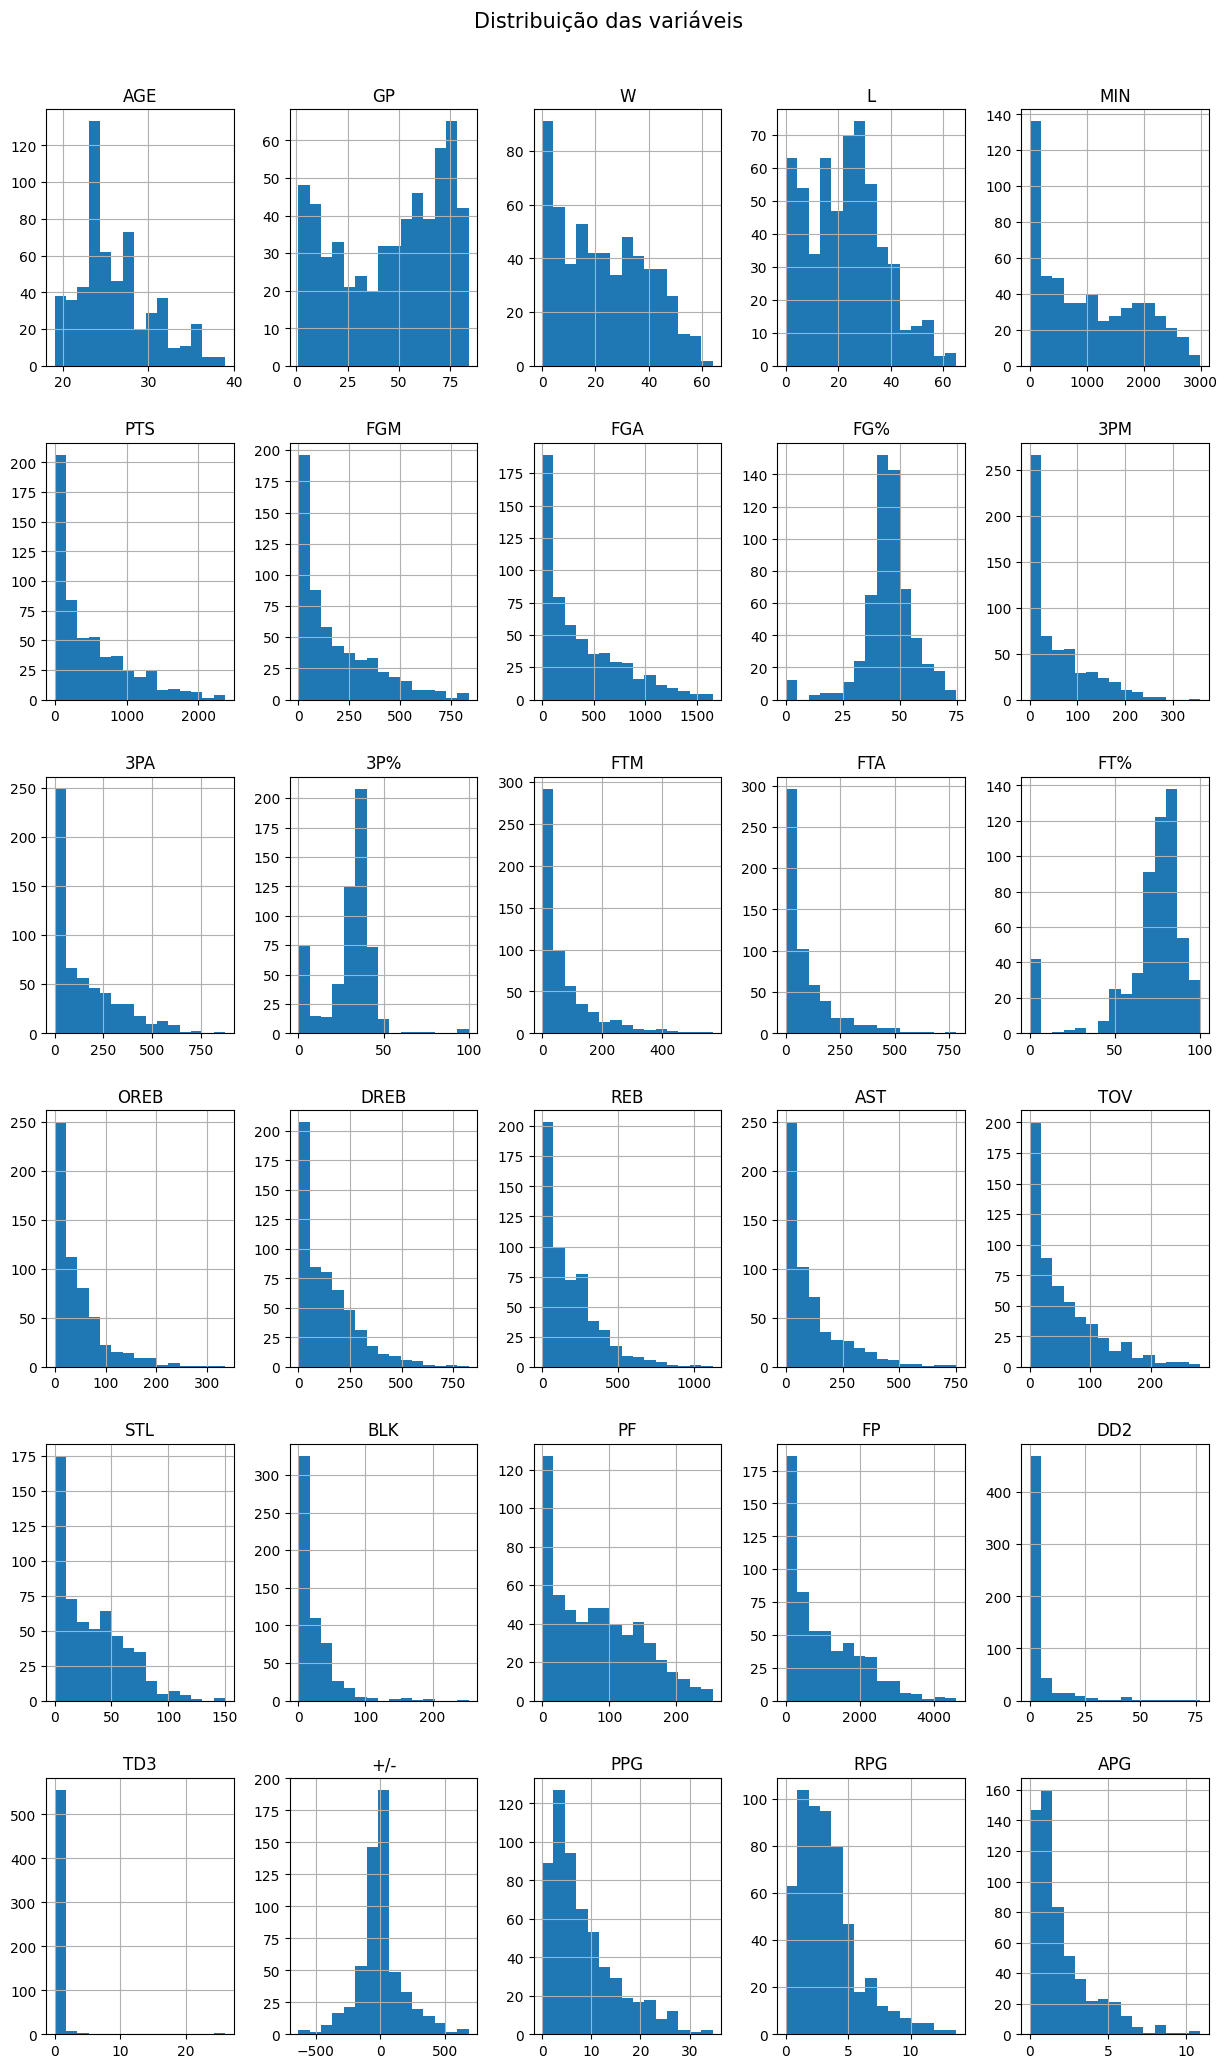

In [ ]:
df3.drop(['TEAMID'], axis=1).hist(bins=15, figsize=(15, 25))
plt.suptitle('Distribuição das variáveis', y=0.92, fontsize=15)
plt.show()

A maioria das variáveis mostra uma assimetria a direita, o que pode indicar uma forte presença de outliers. Essa característica implica numa necessidade de normalização dos dados, como feito anteriormente, para uso em modelagens utilizando machine learning.

No cenário atual de análise de dados de jogadores de NBA, a presença de outliers é importante para avaliar padrões nas características dos jogadores comuns e que se destacam. Por exemplo, no gráfico AGE vemos que a maioria dos jogadores está na faixa de idade entre 20 e 30 anos. Se quisermos analisar o comportamento de jogadores mais velhos, podemos focar a análise nos outliers desse grupo.

A distribuição mais próxima do normal, em questão, é a da variável +/- (plus minus). Ela mostra que a maioria dos jogadores tem um impacto neutro ou próximo da média no placar do jogo, com poucos jogadores mostrando um impacto muito positivo ou negativo. Essa análise pode ajudar no ajuste de estratégias da equipe, de forma a direcionar a escolha dos jogadores para maximizar a média de impacto do jogo.

Aqui temos o boxplot de cada coluna, onde identificamos as medianas, os quartis e os outliers.

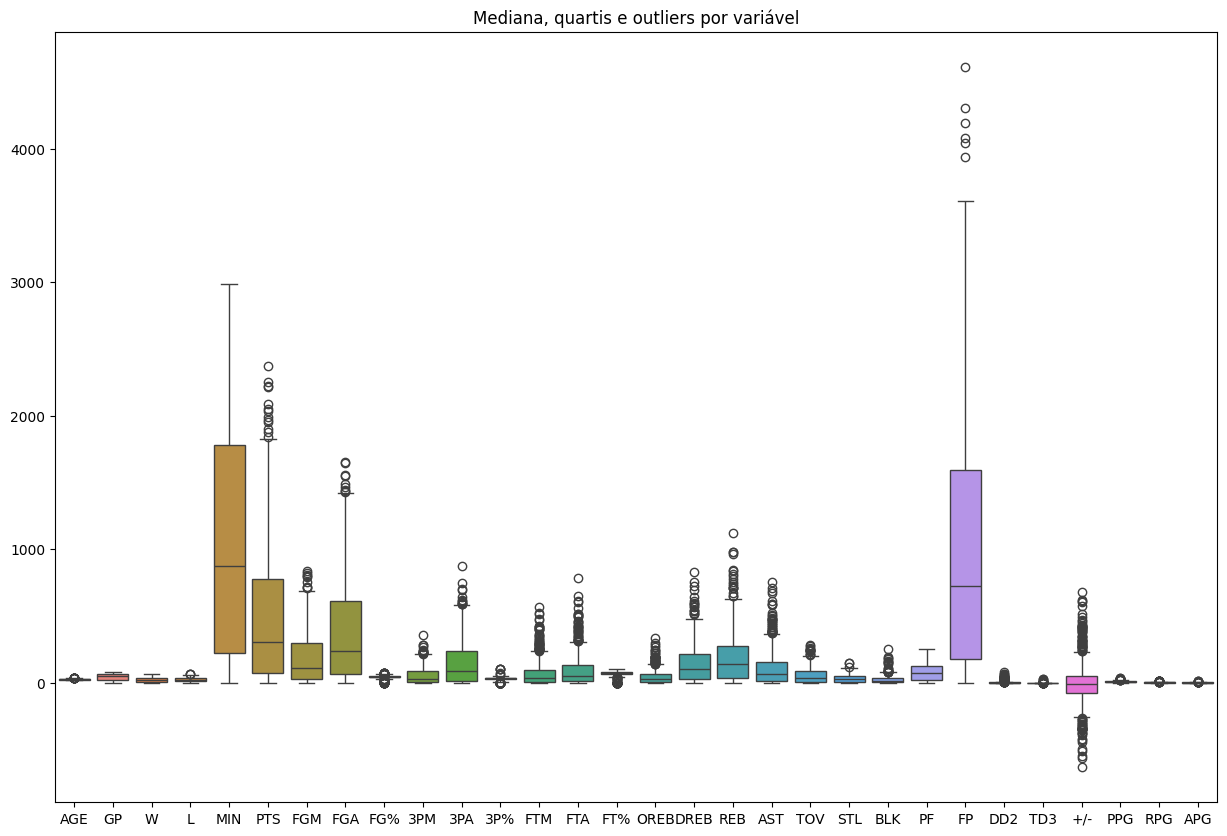

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df3.drop(['TEAMID'], axis=1))
plt.title('Mediana, quartis e outliers por variável')
plt.show()

Analisando os boxplots anteriores, vemos duas variáveis em destaque: FP (fantasy points) e MIN (minutes played).

Com relação a FP, ela é uma métrica calculada a partir de vários dados estatísticos dos jogadores, como pontos, rebotes, assistências etc. A distribuição larga mostra uma grande variabilidade no desempenho dos jogadores, com o Q3 ligeiramente maior que o Q1, o que soma mais jogadores acima da mediana. O alto limite superior mostra uma grande variabilidade de dados acima do Q3 e os jogadores acima desse limite podem ser considerados com desempenhos excepcionais. Podemos ver que não existem jogadores abaixo do limite inferior, ou seja, nenhum jogador tem performance extremamente baixa.

Já com relação ao MIN, vemos que a distribuição é quase simétrica e sem a presença de outliers, o que faz sentido visto que os jogos têm tempos totais padrão. A distribuição tende a uma assimetria a direita, o que indica que há um número considerável de jogadores que jogam um pouco mais do que a mediana, mas há poucos jogadores que jogam muito mais minutos. A falta de outliers pode indicar que a rotação entre os jogadores é feita de forma balanceada, com uma carga de trabalho sem extremos.

In [ ]:
df3.dtypes

AGE         float64
GP          float64
W           float64
L           float64
MIN         float64
PTS         float64
FGM         float64
FGA         float64
FG%         float64
3PM         float64
3PA         float64
3P%         float64
FTM         float64
FTA         float64
FT%         float64
OREB        float64
DREB        float64
REB         float64
AST         float64
TOV         float64
STL         float64
BLK         float64
PF          float64
FP          float64
DD2         float64
TD3         float64
+/-         float64
TEAMID      float64
PPG         float64
RPG         float64
APG         float64
PLAYER       object
TEAM         object
PPG_DIS    category
RPG_DIS    category
APG_DIS    category
dtype: object

Aqui temos uma análise de correlação feita com mapa de calor.

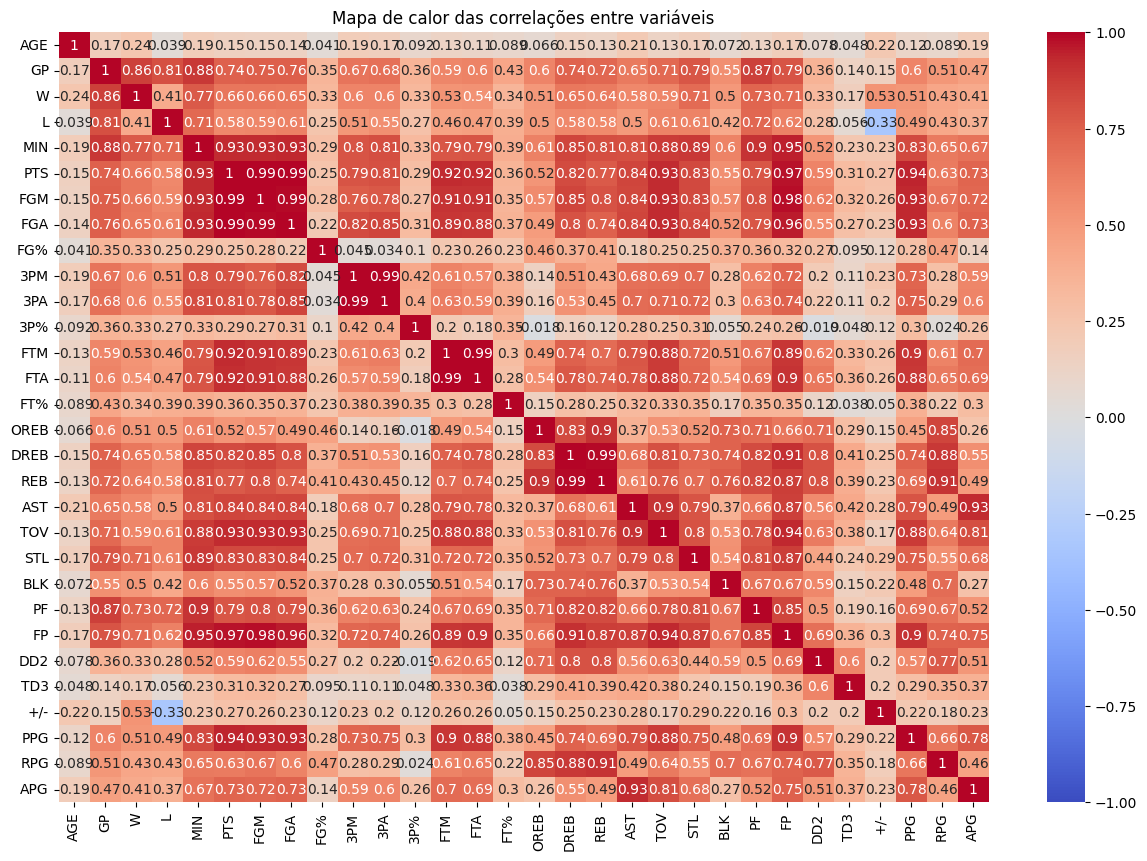

In [ ]:
corr = df3.drop(['PLAYER', 'TEAMID', 'TEAM', 'PPG_DIS', 'RPG_DIS', 'APG_DIS'], axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor das correlações entre variáveis')
plt.show()

Pelo mapa de calor, podemos observar que a maioria das variáveis possui correlação positiva alta ou moderada entre si. Esse comportamento é esperado, visto que muitas das variáveis do dataset derivam de outras. Por exemplo, Offensive Rebounds (OREB) e Defensive Rebounds (DREB) são diretamente ligadas a Rebounds (REB).

Por conta disso, decidimos fazer uma análise utilizando Pairplots com o par de variáveis que mostrou a menor correlação: L e +/-, as quais correspondem a uma correlação de -0.33.

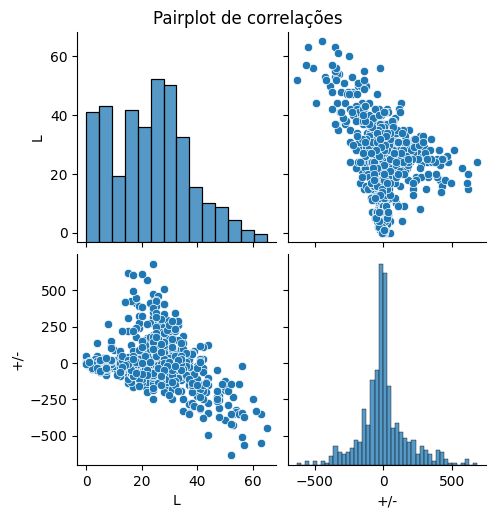

In [ ]:
sns.pairplot(df, vars=['L', '+/-'])
plt.suptitle('Pairplot de correlações', y=1.02)
plt.show()

O histograma do 2º quadrante indica uma assimetria à direita na variável L, enquanto que o histograma do 4º quadrante indica uma distribuição próxima do normal na variável +/-.

Já nos gráficos de dispersão nos quadrantes 1 e 3, as curvas descendentes comprovam a correlação negativa entre as variáveis, indicando que quando uma sobe, a outra desce e vice-versa.

Essa análise condiz com o significado das variáveis, pois L indica o número de partidas em que o time do jogador perdeu e o +/- indica o saldo de pontos, ou seja, a diferença entre os pontos feitos pelo time do jogador e o time adversário. Se existem mais perdas, então a maioria dos saldos são negativos.

### Testes de Hipótese

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

Estaremos usando o valor de significância de 5% (alfa = 0,05)

#### Existe diferença relevante entre a taxa de Rebotes Ofensivos e Defensivos do Sacramento Kings?

Escolhemos o Sacramento Kings para fazer essa análise por ser o time com o maior número de rebotes durante a temporada regular. Assim queremos verificar se eles se sobressaem em algum dos lados da quadra

Aqui verificamos se a diferença entre as colunas segue a gaussiana

In [ ]:
df3['REB_DIF'] = df3['DREB'] - df3['OREB']

<Axes: ylabel='Frequency'>

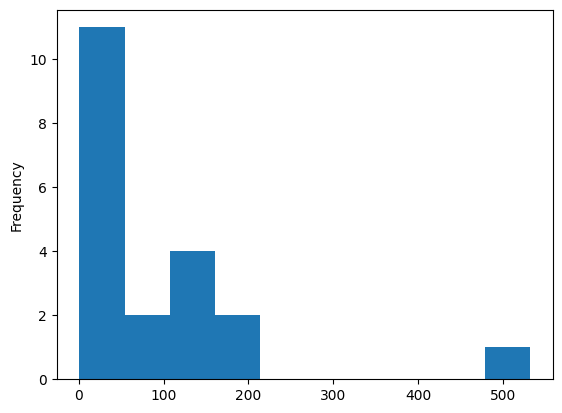

In [ ]:
df3[df3['TEAM'] == 'SAC']['REB_DIF'].plot(kind='hist')

Apenas observando o plot podemos perceber que não, mas vamos fazer o Shapito para ter certeza.

In [ ]:
stats.shapiro(df3[df3['TEAM'] == 'SAC']['REB_DIF'])

ShapiroResult(statistic=0.7030165195465088, pvalue=4.244046067469753e-05)

Como o pvalue foi abaixo do valor de significância, a hipotese nula foi rejeitada, e vemos que, de fato, a população não é normalmente distribuida.

Usamos neste caso o teste Wilcoxon, pois temos um teste pareado (mesmo grupo em diferente situação) sem distribuição normal

In [ ]:
stats.wilcoxon(df3[df3['TEAM'] == 'SAC']['DREB'],df3[df3['TEAM'] == 'SAC']['OREB'])

MannwhitneyuResult(statistic=283.5, pvalue=0.024710740217877662)

Como o pvalue foi abaixo do valor de significância, rejeitamos a hipótese nula.

Nesse caso as populações não tem a mesma distribuição, e existe sim uma diferença relevante.

#### Existe diferença de pontuação "relevante" entre as equipes finalistas durante a temporada regular?

Aqui desejamos verificar se as equipes estão equilibradas em termos de pontuação.

<Axes: ylabel='Frequency'>

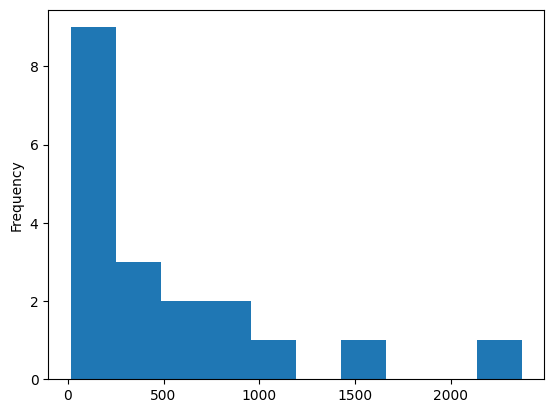

In [ ]:
df3[df3['TEAM'] == 'DAL']['PTS'].plot(kind='hist')

In [ ]:
stats.shapiro(df3[df3['TEAM'] == 'DAL']['PTS'])

ShapiroResult(statistic=0.8071429133415222, pvalue=0.001453957287594676)

<Axes: ylabel='Frequency'>

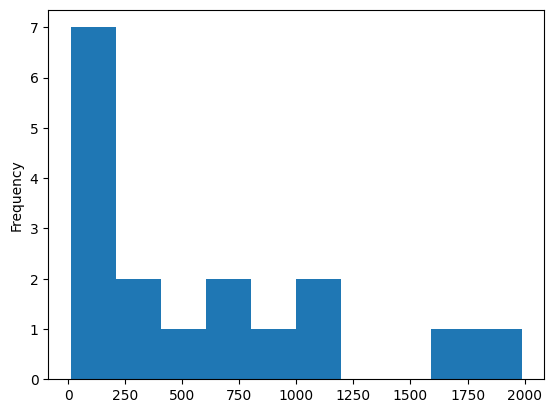

In [ ]:
df3[df3['TEAM'] == 'BOS']['PTS'].plot(kind='hist')

In [ ]:
stats.shapiro(df3[df3['TEAM'] == 'BOS']['PTS'])

ShapiroResult(statistic=0.8732409477233887, pvalue=0.024748407304286957)

Os dois testes foram abaixo do valor de significância, logo as duas não seguem a distribuição normal

In [ ]:
stats.mannwhitneyu(df3[df3['TEAM'] == 'DAL']['PTS'],df3[df3['TEAM'] == 'BOS']['PTS'])

MannwhitneyuResult(statistic=148.0, pvalue=0.6803071218624406)

Como p pvalue foi acima do valor de significância, não rejeitamos a hipótese nula.

Nesse caso as populações tem a mesma distribuição

#### Existe diferença relevante entre a taxa de arremesos convertidos de 3PM, entre o time mais vitorioso e o menos vitorioso?

Aqui desejamos verificar a magnitude e relevância do arremeso de 3 pontos, comparando os times em primeiro e último lugar na temporada regular.

<Axes: ylabel='Frequency'>

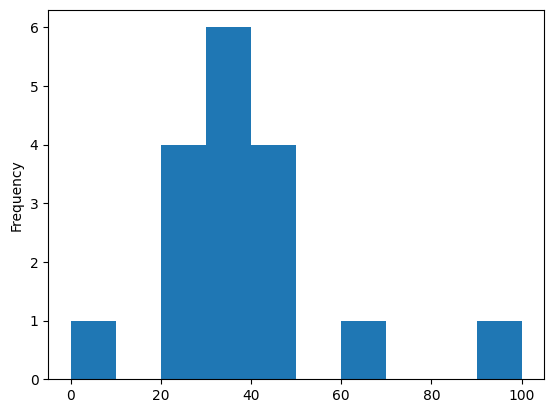

In [ ]:
df3[df3['TEAM'] == 'BOS']['3P%'].plot(kind='hist')

In [ ]:
stats.shapiro(df3[df3['TEAM'] == 'BOS']['3P%'])

ShapiroResult(statistic=0.8308583498001099, pvalue=0.005550635512918234)

<Axes: ylabel='Frequency'>

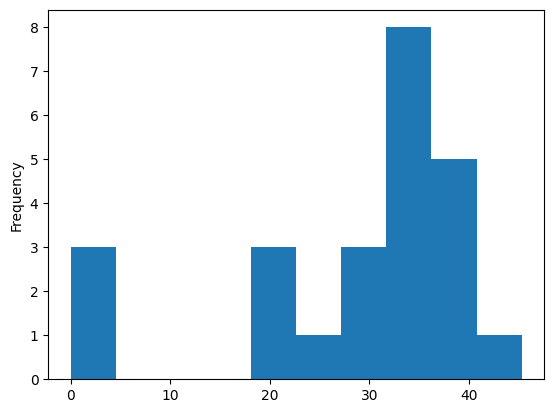

In [ ]:
df3[df3['TEAM'] == 'DET']['3P%'].plot(kind='hist')

In [ ]:
stats.shapiro(df3[df3['TEAM'] == 'DET']['3P%'])

ShapiroResult(statistic=0.8239562511444092, pvalue=0.0007455289014615119)

Os dois testes foram abaixo do valor de significância, logo as duas não seguem a distribuição normal

In [ ]:
stats.mannwhitneyu(df3[df3['TEAM'] == 'BOS']['3P%'],df3[df3['TEAM'] == 'DET']['3P%'])

MannwhitneyuResult(statistic=287.5, pvalue=0.0279530171822616)

Como p pvalue foi abaixo do valor de significância, rejeitamos a hipótese nula.

Nesse caso as populações tem distribuições diferentes, evidenciando a relevância dos arremessos de 3 pontos no modelo de jogo atual.

# Projeto 2

Decidimos escolher a variável +/- (Plus-Minus) como objetivo da regressão, pois ela define quão bem o time performa enquanto o jogador está em quadra. É uma variável que também não pode ser calculada por fórmulas diretas.

Abaixo fazemos a normalização definida anteriormente, de forma a manter os valores da coluna Plus-Minus.

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [33]:
df_normalized = df3.drop(['PLAYER', 'TEAM', 'TEAMID', '+/-', 'PPG_DIS', 'RPG_DIS', 'APG_DIS'], axis=1)

In [34]:
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

In [35]:
df_normalized.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,TOV,STL,BLK,PF,FP,DD2,TD3,PPG,RPG,APG
0,0.05,0.228916,0.125000,0.184615,0.056896,0.020253,0.021505,0.037530,0.388220,0.028011,...,0.028369,0.006667,0.007874,0.023622,0.016923,0.000000,0.0,0.069180,0.065893,0.022939
1,0.60,0.939759,0.546875,0.676923,0.803474,0.562447,0.562724,0.665860,0.572959,0.672269,...,0.397163,0.640000,0.102362,0.704724,0.495552,0.012987,0.0,0.486373,0.252080,0.286881
2,0.30,0.530120,0.312500,0.384615,0.228120,0.118987,0.130227,0.113196,0.780455,0.000000,...,0.156028,0.166667,0.110236,0.421260,0.151443,0.000000,0.0,0.180636,0.314008,0.093794
3,0.50,0.867470,0.515625,0.615385,0.630008,0.352743,0.421744,0.374092,0.764391,0.000000,...,0.262411,0.286667,0.417323,0.645669,0.494033,0.493506,0.0,0.330104,0.778278,0.114380
4,0.35,0.674699,0.406250,0.476923,0.562402,0.375949,0.363202,0.401332,0.614458,0.327731,...,0.294326,0.266667,0.062992,0.574803,0.297895,0.038961,0.0,0.450578,0.285150,0.140048


### Divisão de treino, validação e teste
Dividimos os dados em 70% dos dados para treino e 30% para teste.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_normalized
y = df3['+/-']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Algoritmos de regressão para teste
- Regressão Linear
- Gradient Boosting
- Random Forest
- Support Vector Regression

### MLFlow
Utilizamos MLFlow através de conexão com o ngrok.

In [39]:
%%capture
!pip install mlflow
!pip install pyngrok

In [40]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

In [41]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [60]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
mlflow.set_experiment("prediction-experiment-svr")

2024/07/11 01:58:34 INFO mlflow.tracking.fluent: Experiment with name 'prediction-experiment-svr' does not exist. Creating a new experiment.


<Experiment: artifact_location='/content/mlruns/5', creation_time=1720663114349, experiment_id='5', last_update_time=1720663114349, lifecycle_stage='active', name='prediction-experiment-svr', tags={}>

In [61]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://9d39-34-145-49-253.ngrok-free.app" -> "http://127.0.0.1:5000"


### Métrica de comparação de modelos
Utilizamos a MSE (Mean Squared Error), que mede o erro quadrático médio de um modelo de regressão e é amplamente usada em análises de modelos de machine learning.

Também usamos a MAPE (Mean Absolute Percentage Error), que mede o erro absoluto percentual médio.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

### Optuna
Utilizamos Optuna para achar a melhor combinação de hiperparâmetros de cada modelo.

Cada um foi rodado 50 vezes, com 3 hiperparâmetros cada, variando seus valores de acordo com seus respectivos intervalos.

No fim das 50 iterações, o Optuna identificou as combinações que levaram aos melhores resultados.

In [45]:
!pip install optuna

In [48]:
import optuna

### Modelo 1: Regressão Linear

In [49]:
from sklearn.linear_model import Ridge

In [50]:
def objective_ridge(trial):
    with mlflow.start_run(nested=True):
        params = {
            "alpha": trial.suggest_float("alpha", 1e-4, 1e1),
            "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
            "solver": trial.suggest_categorical("solver", ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"])
        }
        mlflow.log_params(params)

        model = Ridge(**params, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mape", mape)
        mlflow.sklearn.log_model(model, "model")

        trial.set_user_attr("mape", mape)

        return mse

study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(objective_ridge, n_trials=50)

best_trial = study_ridge.best_trial

print(f'Best parameters for Linear Regression: {study_ridge.best_params}')
print(f'Best MSE for Linear Regression: {study_ridge.best_value}')
print(f'Best MAPE for Linear Regression: {best_trial.user_attrs["mape"]}')

[I 2024-07-11 01:38:46,203] A new study created in memory with name: no-name-82e8b806-addf-4ecb-abe4-070faecd26ad
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[I 2024-07-11 01:38:51,414] Trial 0 finished with value: 10543.764772068018 and parameters: {'alpha': 6.790633537770329, 'fit_intercept': False, 'solver': 'sag'}. Best is trial 0 with value: 10543.764772068018.
[I 2024-07-11 01:38:54,287] Trial 1 finished with value: 8928.093222865593 and parameters: {'alpha': 2.973737849044193, 'fit_intercept': False, 'solver': 'cholesky'}. Best is trial 1 with value: 8928.093222865593.
[I 2024-07-11 01:38:56,853] Trial 2 finished with value: 10934.413993293863 and parameters: {'alpha': 7.577662704992067, 'fit_intercept': True, 'solver': 'saga'}. Best is trial 1 with value: 8928.093222865593.
[I 2024-07-11 01:38:59,905] Trial 3 finished with value: 9904.012702125592 an

Best parameters for Linear Regression: {'alpha': 0.0015131036773280843, 'fit_intercept': True, 'solver': 'sparse_cg'}
Best MSE for Linear Regression: 7320.6148223944465
Best MAPE for Linear Regression: 2.0313949589306213


### Modelo 2: Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
def objective_gb(trial):
    with mlflow.start_run(nested=True):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1),
            "max_depth": trial.suggest_int("max_depth", 2, 10)
        }
        mlflow.log_params(params)

        model = GradientBoostingRegressor(**params, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mape", mape)
        mlflow.sklearn.log_model(model, "model")

        trial.set_user_attr("mape", mape)

        return mse

study_gb = optuna.create_study(direction="minimize")
study_gb.optimize(objective_gb, n_trials=50)

best_trial = study_gb.best_trial

print(f'Best parameters for Gradient Boosting: {study_gb.best_params}')
print(f'Best MSE for Gradient Boosting: {study_gb.best_value}')
print(f'Best MAPE for Gradient Boosting: {best_trial.user_attrs["mape"]}')

[I 2024-07-11 01:47:04,711] A new study created in memory with name: no-name-f021cdfe-212b-4676-9984-93d36b23d502
[I 2024-07-11 01:47:08,643] Trial 0 finished with value: 9746.627282928286 and parameters: {'n_estimators': 62, 'learning_rate': 0.052810550850268596, 'max_depth': 7}. Best is trial 0 with value: 9746.627282928286.
[I 2024-07-11 01:47:13,051] Trial 1 finished with value: 23025.634338909025 and parameters: {'n_estimators': 112, 'learning_rate': 0.0009318346737641591, 'max_depth': 2}. Best is trial 0 with value: 9746.627282928286.
[I 2024-07-11 01:47:16,282] Trial 2 finished with value: 12367.733518156341 and parameters: {'n_estimators': 51, 'learning_rate': 0.07255924162713952, 'max_depth': 10}. Best is trial 0 with value: 9746.627282928286.
[I 2024-07-11 01:47:20,148] Trial 3 finished with value: 6736.42429510155 and parameters: {'n_estimators': 202, 'learning_rate': 0.08210385563170992, 'max_depth': 4}. Best is trial 3 with value: 6736.42429510155.
[I 2024-07-11 01:47:23,5

Best parameters for Gradient Boosting: {'n_estimators': 280, 'learning_rate': 0.07374890211209359, 'max_depth': 3}
Best MSE for Gradient Boosting: 6126.302784888885
Best MAPE for Gradient Boosting: 1.4168557763962126


### Modelo 3: Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
def objective_rf(trial):
    with mlflow.start_run(nested=True):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20)
        }
        mlflow.log_params(params)

        model = RandomForestRegressor(**params, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mape", mape)
        mlflow.sklearn.log_model(model, "model")

        trial.set_user_attr("mape", mape)

        return mse

study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(objective_rf, n_trials=50)

best_trial = study_rf.best_trial

print(f'Best parameters for Random Forest: {study_rf.best_params}')
print(f'Best MSE for Random Forest: {study_rf.best_value}')
print(f'Best MAPE for Random Forest: {best_trial.user_attrs["mape"]}')

[I 2024-07-11 01:53:19,938] A new study created in memory with name: no-name-9db31204-09e0-45a2-a386-6a3b503b60d6
[I 2024-07-11 01:53:23,135] Trial 0 finished with value: 7485.072669262499 and parameters: {'n_estimators': 90, 'max_depth': 17, 'min_samples_split': 9}. Best is trial 0 with value: 7485.072669262499.
[I 2024-07-11 01:53:26,009] Trial 1 finished with value: 11626.297643206175 and parameters: {'n_estimators': 114, 'max_depth': 2, 'min_samples_split': 8}. Best is trial 0 with value: 7485.072669262499.
[I 2024-07-11 01:53:30,556] Trial 2 finished with value: 7458.949358619178 and parameters: {'n_estimators': 255, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 2 with value: 7458.949358619178.
[I 2024-07-11 01:53:35,015] Trial 3 finished with value: 7463.725060787867 and parameters: {'n_estimators': 79, 'max_depth': 20, 'min_samples_split': 9}. Best is trial 2 with value: 7458.949358619178.
[I 2024-07-11 01:53:39,075] Trial 4 finished with value: 8256.90426032566 and pa

Best parameters for Random Forest: {'n_estimators': 43, 'max_depth': 7, 'min_samples_split': 7}
Best MSE for Random Forest: 7153.103911391873
Best MAPE for Random Forest: 1.4370082844126375


### Modelo 4: Suport Vector Regression

In [62]:
from sklearn.svm import SVR

In [63]:
def objective_svr(trial):
    with mlflow.start_run(nested=True):
        params = {
            "C": trial.suggest_float("C", 1e-2, 1e2),
            "epsilon": trial.suggest_float("epsilon", 1e-4, 1e-1),
            "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
        }
        mlflow.log_params(params)

        model = SVR(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mape", mape)
        mlflow.sklearn.log_model(model, "model")

        trial.set_user_attr("mape", mape)

        return mse

study_svr = optuna.create_study(direction="minimize")
study_svr.optimize(objective_svr, n_trials=50)

best_trial = study_svr.best_trial

print(f'Best parameters for Support Vector Regression: {study_svr.best_params}')
print(f'Best MSE for Support Vector Regression: {study_svr.best_value}')
print(f'Best MAPE for Support Vector Regression: {best_trial.user_attrs["mape"]}')

[I 2024-07-11 01:59:11,768] A new study created in memory with name: no-name-d54d7005-a84e-43ea-89e5-81585070729c
[I 2024-07-11 01:59:15,512] Trial 0 finished with value: 5842.260844313628 and parameters: {'C': 62.303333075110075, 'epsilon': 0.011122741811381927, 'kernel': 'poly'}. Best is trial 0 with value: 5842.260844313628.
[I 2024-07-11 01:59:18,817] Trial 1 finished with value: 10413.620437621688 and parameters: {'C': 40.79764100227632, 'epsilon': 0.017885718810457155, 'kernel': 'rbf'}. Best is trial 0 with value: 5842.260844313628.
[I 2024-07-11 01:59:21,427] Trial 2 finished with value: 8347.64878387881 and parameters: {'C': 1.714613835105735, 'epsilon': 0.01673626112704683, 'kernel': 'poly'}. Best is trial 0 with value: 5842.260844313628.
[I 2024-07-11 01:59:23,995] Trial 3 finished with value: 5834.134069111336 and parameters: {'C': 67.37341793341108, 'epsilon': 0.09026057331666629, 'kernel': 'poly'}. Best is trial 3 with value: 5834.134069111336.
[I 2024-07-11 01:59:26,554] 

Best parameters for Support Vector Regression: {'C': 99.98948879699833, 'epsilon': 0.052722228446247105, 'kernel': 'poly'}
Best MSE for Support Vector Regression: 5808.741261716317
Best MAPE for Support Vector Regression: 1.2966849381887953


### Diagnóstico
O modelo que teve o melhor resultado foi o **Support Vector Regression** (SVR), com valores mínimos de erro (MSE e MAPE) quando comparado aos outros modelos.

O valor da MAPE igual a 1.29 % mostra um resultado muito bom do modelo, com uma taxa de erro bastante baixa.

Pelo MSE comparar valores quadráticos, então a taxa de erro aparece numa escala maior.

### Tentativa de melhoria do modelo SVR
Utilizamos o método de Bagging, ou Bootstrap Aggregating, para melhorar o modelo SVR pré-treinado. É uma técnica de ensemble que envolve treinar múltiplos modelos em diferentes subconjuntos dos dados e combinar as reposições no final.

In [65]:
from sklearn.ensemble import BaggingRegressor

In [67]:
# Cria o modelo SVR com os melhores parâmetros
best_params = study_svr.best_params

best_model = SVR(**best_params)

# Cria e configura o bagging
bagging_model = BaggingRegressor(best_model, n_estimators=10, random_state=42, n_jobs=-1)

# Treina o modelo
bagging_model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = bagging_model.predict(X_test)

# Avalia o desempenho do modelo
test_mse = mean_squared_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE no conjunto de teste: {test_mse}')
print(f'MAPE no conjunto de teste: {test_mape}')

MSE no conjunto de teste: 5749.491324204294
MAPE no conjunto de teste: 1.327099802154826


A métrica **MSE melhorou o resultado** (diminuiu o erro médio quadrático) após a aplicação do Bagging, enquanto que a métrica MAPE aumentou em casas decimais a porcentagem.